## Implementing the AD-DICE model from (Bruin et al., 2007) in Mimi

First, we initialize.

In [1]:
using Pkg;
Pkg.activate(".") # activate the environment in the "modelling" folder
Pkg.instantiate() # install the packages in the environment

#Pkg.rm("MimiDICE2016R2") #run this if MimiDICE2016R2 is installed

  Activating project at `~/Desktop/MY PROJECT/Amila's Project`


### 1. Implementing protection as fixed parameter to reproduce results from paper (Bruin et al., 2009)

First we consider protection to be a set parameter, i.e. it is not a policy variable and is not optimised, analogous to the paper. (PROT = {0, 1})

In [2]:
Pkg.rm("OptADDICE") #run this whenever OptADDICE is installed
Pkg.add(url="https://github.com/felixschaumann/OptMimiDICE2016R2.jl.git")
Pkg.add("Mimi")

    Updating `~/Desktop/MY PROJECT/Amila's Project/Project.toml`
  [f1883be1] - OptADDICE v0.1.1-DEV `https://github.com/LittleLibraryFox/Mimi.AD-DICE.git#main`
    Updating `~/Desktop/MY PROJECT/Amila's Project/Manifest.toml`
  [a4c015fc] - ANSIColoredPrinters v0.0.1
  [1520ce14] - AbstractTrees v0.4.5
  [8f4d0f93] - Conda v1.10.0
  [e30172f5] - Documenter v1.4.1
  [634d3b9d] - DrWatson v2.15.0
  [8f5d6c58] - EzXML v1.2.0
  [d7ba0133] - Git v1.3.1
  [b5f81e59] - IOCapture v0.2.5
  [033835bb] - JLD2 v0.4.48
  [0e77f7df] - LazilyInitializedFields v1.2.2
  [d0879d2d] - MarkdownAST v0.1.2
  [76087f3c] - NLopt v1.0.2
  [f1883be1] - OptADDICE v0.1.1-DEV `https://github.com/LittleLibraryFox/Mimi.AD-DICE.git#main`
  [438e738f] - PyCall v1.96.4
  [d330b81b] - PyPlot v2.11.2
  [2792f1a3] - RegistryInstances v0.1.0
  [3a884ed6] - UnPack v1.0.2
  [81def892] - VersionParsing v1.3.0
  [fdbf4ff8] - XLSX v0.10.1
  [a5390f91] - ZipFile v0.10.1
  [f8c6e375] - Git_jll v2.44.0+2
  [079eb43e] - NLopt_jll 

In [3]:
Pkg.status()

Status `~/Desktop/MY PROJECT/Amila's Project/Project.toml`
  [b964fa9f] LaTeXStrings v1.3.1
  [e4e893b0] Mimi v1.5.3
  [f1883be1] OptMimiDICE2016R2 v0.1.1-DEV `https://github.com/felixschaumann/OptMimiDICE2016R2.jl.git#main`
  [91a5bcdd] Plots v1.40.4


In [4]:
using Mimi
using OptMimiDICE2016R2

In [5]:
m_opt_noPROT = OptMimiDICE2016R2.get_model()
run(m_opt_noPROT)

m_opt_onlyPROT = OptMimiDICE2016R2.get_model()
run(m_opt_onlyPROT)

We include the modified damages:

In [6]:
include("./modified_damages_adapt.jl")
replace!(m_opt_noPROT, :damages => modified_damages_adapt);

replace!(m_opt_onlyPROT, :damages => modified_damages_adapt);

And then set the parameters as calibrated in the paper:

In [7]:
update_param!(m_opt_noPROT, :damages, :a1, 0.0012)
update_param!(m_opt_noPROT, :damages, :a2, 0.0023)
update_param!(m_opt_noPROT, :damages, :a3, 2.32)
update_param!(m_opt_noPROT, :damages, :g1, 0.115)
update_param!(m_opt_noPROT, :damages, :g2, 3.60)
update_param!(m_opt_noPROT, :damages, :PROT, 0 .* ones(100)) #no protection so PROT = 0

update_param!(m_opt_onlyPROT, :damages, :a1, 0.0012)
update_param!(m_opt_onlyPROT, :damages, :a2, 0.0023)
update_param!(m_opt_onlyPROT, :damages, :a3, 2.32)
update_param!(m_opt_onlyPROT, :damages, :g1, 0.115)
update_param!(m_opt_onlyPROT, :damages, :g2, 3.60)
update_param!(m_opt_onlyPROT, :damages, :PROT, 1 .* ones(100)) #only protection so PROT = 1

true

In [8]:
run(m_opt_noPROT)
run(m_opt_onlyPROT)

In [9]:
@time m_opt_noPROT, diagn = OptMimiDICE2016R2.optimise_model(m_opt_noPROT)
@time m_opt_onlyPROT, diagn = OptMimiDICE2016R2.optimise_model(m_opt_onlyPROT)
    n

325.419602 seconds (177.68 M allocations: 7.486 GiB, 0.53% gc time, 0.08% compilation time)
283.642078 seconds (120.31 M allocations: 5.063 GiB, 0.68% gc time)


(m = Mimi.Model
  Module: Mimi
  Components:
    ComponentId(OptMimiDICE2016R2.totalfactorproductivity)
    ComponentId(OptMimiDICE2016R2.grosseconomy)
    ComponentId(OptMimiDICE2016R2.emissions)
    ComponentId(OptMimiDICE2016R2.co2cycle)
    ComponentId(OptMimiDICE2016R2.radiativeforcing)
    ComponentId(OptMimiDICE2016R2.climatedynamics)
    ComponentId(Main.modified_damages_adapt)
    ComponentId(OptMimiDICE2016R2.neteconomy)
    ComponentId(OptMimiDICE2016R2.welfare)
  Dimensions:
    time => [2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100, 2105, 2110, 2115, 2120, 2125, 2130, 2135, 2140, 2145, 2150, 2155, 2160, 2165, 2170, 2175, 2180, 2185, 2190, 2195, 2200, 2205, 2210, 2215, 2220, 2225, 2230, 2235, 2240, 2245, 2250, 2255, 2260, 2265, 2270, 2275, 2280, 2285, 2290, 2295, 2300, 2305, 2310, 2315, 2320, 2325, 2330, 2335, 2340, 2345, 2350, 2355, 2360, 2365, 2370, 2375, 2380, 2385, 2390, 2395, 2400, 2405, 2410, 2415, 2420, 242

In [10]:
explore(m_opt_noPROT)
explore(m_opt_onlyPROT)

Electron.Window(Application(Base.PipeEndpoint(RawFD(24) paused, 0 bytes waiting), Process(setenv(`/Users/amila/.julia/artifacts/28d75c9551b709f4f8172bf33e631b433c6c68d6/Julia.app/Contents/MacOS/Julia /Users/amila/.julia/packages/Electron/LXyZ0/src/main.js /var/folders/7r/ghvh9rnj2zz9lnxjltftjs7m0000gn/T/jlel-9fab6ee42ff511ef0ea0e1639d798e5d /var/folders/7r/ghvh9rnj2zz9lnxjltftjs7m0000gn/T/jlel-sn-9fab90542ff511ef22975ff71a1ca3f2 wdRhOCAVwiZQSyQ3MuH+BqUhDvdd5l5m4Bmx+Rx/w0EY/ea87BctsE/2YjkHms8DKb+gu9l4KJ34zyG/tBlbMWalyjrdzeV2d5kY1swHqNXVbb8LTNAYIU+Cbn2HjwsvE+lqtM3dUHoUs3lwsIgni1lexzJqUy4fT7jGUZGDyUQ=`,["XPC_FLAGS=0x0", "VSCODE_L10N_BUNDLE_LOCATION=", "COMMAND_MODE=unix2003", "CONDA_PROMPT_MODIFIER=(base) ", "PATH=/opt/miniconda3/bin:/opt/miniconda3/condabin:/Users/amila/.juliaup/bin:/Library/Frameworks/Python.framework/Versions/3.12/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin", "PWD=/", "VSCODE_CODE_CACHE_PATH=/Users/amila/Library/Application Support/Code/CachedD

### 2. Implementing protection as policy variable

In [11]:

Pkg.rm("OptMimiDICE2016R2") #run this whenever OptMimiDICE2016R2 is installed
#Pkg.rm("OptADDICE") #run this whenever a previous version of OptADDICE was installed and you want to update it

Pkg.add("Mimi")
Pkg.add(url="https://github.com/LittleLibraryFox/Mimi.AD-DICE.git")

    Updating `~/Desktop/MY PROJECT/Amila's Project/Project.toml`
  [f1883be1] - OptMimiDICE2016R2 v0.1.1-DEV `https://github.com/felixschaumann/OptMimiDICE2016R2.jl.git#main`
    Updating `~/Desktop/MY PROJECT/Amila's Project/Manifest.toml`
  [a4c015fc] - ANSIColoredPrinters v0.0.1
  [1520ce14] - AbstractTrees v0.4.5
  [8f4d0f93] - Conda v1.10.0
  [e30172f5] - Documenter v1.4.1
  [634d3b9d] - DrWatson v2.15.0
  [8f5d6c58] - EzXML v1.2.0
  [d7ba0133] - Git v1.3.1
  [b5f81e59] - IOCapture v0.2.5
  [033835bb] - JLD2 v0.4.48
  [0e77f7df] - LazilyInitializedFields v1.2.2
  [d0879d2d] - MarkdownAST v0.1.2
  [76087f3c] - NLopt v1.0.2
  [f1883be1] - OptMimiDICE2016R2 v0.1.1-DEV `https://github.com/felixschaumann/OptMimiDICE2016R2.jl.git#main`
  [438e738f] - PyCall v1.96.4
  [d330b81b] - PyPlot v2.11.2
  [2792f1a3] - RegistryInstances v0.1.0
  [3a884ed6] - UnPack v1.0.2
  [81def892] - VersionParsing v1.3.0
  [fdbf4ff8] - XLSX v0.10.1
  [a5390f91] - ZipFile v0.10.1
  [f8c6e375] - Git_jll v2.44.0

In [12]:
Pkg.status()

Status `~/Desktop/MY PROJECT/Amila's Project/Project.toml`
  [b964fa9f] LaTeXStrings v1.3.1
  [e4e893b0] Mimi v1.5.3
  [f1883be1] OptADDICE v0.1.1-DEV `https://github.com/LittleLibraryFox/Mimi.AD-DICE.git#main`
  [91a5bcdd] Plots v1.40.4


In [13]:
using Mimi
using OptADDICE

In [14]:
m = OptADDICE.get_model()
run(m)

We set the paramters like in the paper (Bruin et al., 2009)

In [15]:
update_param!(m, :damages, :a1, 0.0012)
update_param!(m, :damages, :a2, 0.0023)
update_param!(m, :damages, :a3, 2.32)

run(m)

In [16]:
@time m, diagn = OptADDICE.optimise_model(m)  #takes about 115 seconds

171.250542 seconds (330.72 M allocations: 13.957 GiB, 0.63% gc time, 0.01% compilation time)


(m = Mimi.Model
  Module: Mimi
  Components:
    ComponentId(OptADDICE.totalfactorproductivity)
    ComponentId(OptADDICE.grosseconomy)
    ComponentId(OptADDICE.emissions)
    ComponentId(OptADDICE.co2cycle)
    ComponentId(OptADDICE.radiativeforcing)
    ComponentId(OptADDICE.climatedynamics)
    ComponentId(OptADDICE.damages)
    ComponentId(OptADDICE.neteconomy)
    ComponentId(OptADDICE.welfare)
  Dimensions:
    time => [2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100, 2105, 2110, 2115, 2120, 2125, 2130, 2135, 2140, 2145, 2150, 2155, 2160, 2165, 2170, 2175, 2180, 2185, 2190, 2195, 2200, 2205, 2210, 2215, 2220, 2225, 2230, 2235, 2240, 2245, 2250, 2255, 2260, 2265, 2270, 2275, 2280, 2285, 2290, 2295, 2300, 2305, 2310, 2315, 2320, 2325, 2330, 2335, 2340, 2345, 2350, 2355, 2360, 2365, 2370, 2375, 2380, 2385, 2390, 2395, 2400, 2405, 2410, 2415, 2420, 2425, 2430, 2435, 2440, 2445, 2450, 2455, 2460, 2465, 2470, 2475, 2480, 2485,

In [17]:
explore(m)

Electron.Window(Application(Base.PipeEndpoint(RawFD(24) paused, 0 bytes waiting), Process(setenv(`/Users/amila/.julia/artifacts/28d75c9551b709f4f8172bf33e631b433c6c68d6/Julia.app/Contents/MacOS/Julia /Users/amila/.julia/packages/Electron/LXyZ0/src/main.js /var/folders/7r/ghvh9rnj2zz9lnxjltftjs7m0000gn/T/jlel-9fab6ee42ff511ef0ea0e1639d798e5d /var/folders/7r/ghvh9rnj2zz9lnxjltftjs7m0000gn/T/jlel-sn-9fab90542ff511ef22975ff71a1ca3f2 wdRhOCAVwiZQSyQ3MuH+BqUhDvdd5l5m4Bmx+Rx/w0EY/ea87BctsE/2YjkHms8DKb+gu9l4KJ34zyG/tBlbMWalyjrdzeV2d5kY1swHqNXVbb8LTNAYIU+Cbn2HjwsvE+lqtM3dUHoUs3lwsIgni1lexzJqUy4fT7jGUZGDyUQ=`,["XPC_FLAGS=0x0", "VSCODE_L10N_BUNDLE_LOCATION=", "COMMAND_MODE=unix2003", "CONDA_PROMPT_MODIFIER=(base) ", "PATH=/opt/miniconda3/bin:/opt/miniconda3/condabin:/Users/amila/.juliaup/bin:/Library/Frameworks/Python.framework/Versions/3.12/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin", "PWD=/", "VSCODE_CODE_CACHE_PATH=/Users/amila/Library/Application Support/Code/CachedD

### 4. Extending the model: modifying the welfare function

In [ ]:
Pkg.rm("OptMimiDICE2016R2") #run this whenever OptMimiDICE2016R2 is installed
#Pkg.rm("OptADDICE") #run this whenever a previous version of OptADDICE was installed and you want to update it

Pkg.add("Mimi")
Pkg.add(url="https://github.com/LittleLibraryFox/Mimi.AD-DICE.git")

In [ ]:
using Mimi
using OptADDICE

In [ ]:
m_wel = OptADDICE.get_model()
run(m_wel)

In [ ]:
update_param!(m_wel, :damages, :a1, 0.0012)
update_param!(m_wel, :damages, :a2, 0.0023)
update_param!(m_wel, :damages, :a3, 2.32)

# the modified welfare component goes here

run(m_wel)

### 5. Plotting the results

In [18]:
Pkg.add("Plots")
Pkg.add("LaTeXStrings")

using Plots
using LaTeXStrings

   Resolving package versions...
  No Changes to `~/Desktop/MY PROJECT/Amila's Project/Project.toml`
  No Changes to `~/Desktop/MY PROJECT/Amila's Project/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/MY PROJECT/Amila's Project/Project.toml`
  No Changes to `~/Desktop/MY PROJECT/Amila's Project/Manifest.toml`


Extracting timesteps for each model:

In [19]:
timesteps = collect(Mimi.dimension(m, :time))
timesteps = [x[1] for x in timesteps];

We consider these variables:
- OptCosts = climate change costs under optimal control
- NoAdCosts = climate change costs under only mitigation
- OnlyAdCosts = climate change costs under only adaptation


In [20]:
OptCosts = m[:damages, :DAMAGES];
NoAdCosts = m_opt_noPROT[:damages, :DAMAGES];
OnlyAdCosts = m_opt_onlyPROT[:damages, :DAMAGES];

Now we plot:

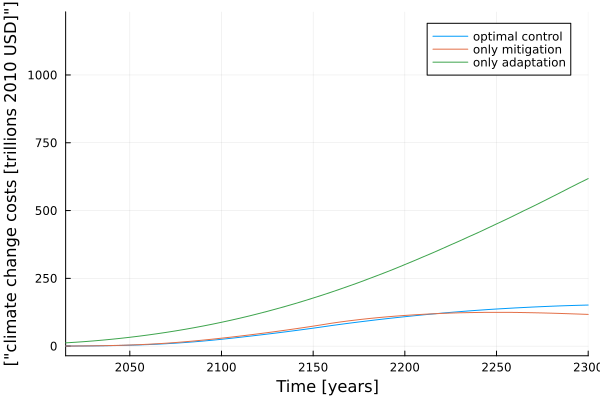

In [21]:
plot(timesteps, [OptCosts NoAdCosts OnlyAdCosts], label=["optimal control" "only mitigation" "only adaptation"], ylabel=["climate change costs [trillions 2010 USD]"], xlabel="Time [years]")
xlims!((2015, 2300))

In [23]:
Plots.pdf("plot2")

"plot2.pdf"